In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def check_nth_bit(num, n):
    return (num>>n)&1

# flip the bit of the integer 'int' at a position 'p'  (staring at 0)
def bitflip(int,p):
    mask = 1 << p
    return (int^ mask)

# count the numbers of 1 on a binarie representetion of an interger n
def CountBits(n):
    n = (n & 0x5555555555555555) + ((n & 0xAAAAAAAAAAAAAAAA) >> 1)
    n = (n & 0x3333333333333333) + ((n & 0xCCCCCCCCCCCCCCCC) >> 2)
    n = (n & 0x0F0F0F0F0F0F0F0F) + ((n & 0xF0F0F0F0F0F0F0F0) >> 4)
    n = (n & 0x00FF00FF00FF00FF) + ((n & 0xFF00FF00FF00FF00) >> 8)
    n = (n & 0x0000FFFF0000FFFF) + ((n & 0xFFFF0000FFFF0000) >> 16)
    n = (n & 0x00000000FFFFFFFF) + ((n & 0xFFFFFFFF00000000) >> 32) 
    return n

# defining n!
#@jit
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# finding the states that have the maginetization "z"
#@jit
def statep(y,z):
    a = 0
    for x in range(0,2**l):
        if (2* CountBits(x)-l) == z:
            y[a] = x
            a += 1
    return (y)

# numbers of states with magnatization x
def num_mag(x):
    y = p = int(factorial(l)//((factorial((x+l)/2))*(factorial(l -((x+l)/2)))))
    return y
            
# find the position in the list of states "s" that are iqual to "b"
#@jit
def find_state(s,b):
    for z in range(0,p+1):
        if s[z] == b:
            return(z)

In [24]:
# number of spins
l = 12
#dimension constant
j = -1

#anisotropy constant
delt = -1

#external MF 
h = 0.

In [25]:
Hxxz = np.zeros((2**l , 2**l ))
# constructing the full xxz hamiltonian (2^L, 2^L) 
for x in range(0,2**l):
    for y in range(0,l):
        k = (y+1)%l
        if check_nth_bit(x,y) == 0:
            Hxxz[x,x] += -j*h/2
        else:
            Hxxz[x,x] += j*h/2
            #if y != l-1:    
        if check_nth_bit(x,y) == check_nth_bit(x,k):
            Hxxz[x,x] += -(j*delt)/2
        else:
            Hxxz[x,x] += (j*delt)/2
            b = bitflip(x,y)
            c = bitflip(b,k)
            Hxxz[x,c] += -j

In [26]:
mag = 0 
p = num_mag(mag)
state = np.array(range(p))
s = statep(state,mag)
        
Hxxz_p = np.zeros((p,p))
for x in range(0,p):
    for y in range(0,l):
        if check_nth_bit(s[x],y) == 0:
            Hxxz_p[x,x] += -(j*h)/2
        else:
            Hxxz_p[x,x] += (j*h)/2
        k = (y+1)%l
                #if y != l-1:
        if check_nth_bit(s[x],y) == check_nth_bit(s[x],k):
            Hxxz_p[x,x] += -(j*delt)/2
        else:
            Hxxz_p[x,x] += (j*delt)/2
            b = bitflip(s[x],y)
            c = bitflip(b,k)
            D = np.where(s == c)
            Hxxz_p[x,D] = -j

In [28]:
eigenvals = (np.sort(np.linalg.eigvals(Hxxz_p)))

In [29]:
sn = np.array([(eigenvals[i+1] - eigenvals[i]) for i in range(len(eigenvals)-1)])
nn = np.array([(sn[i]/sn[i-1]) for i in range(1,len(eigenvals)-1)])
sn
nn

/Users/lfcmoraes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in cdouble_scalars
  
/Users/lfcmoraes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cdouble_scalars
  


array([ 2.28716162e-13+0.00000000e+00j,  3.38639273e+12+0.00000000e+00j,
        4.70767281e-14+0.00000000e+00j,  1.53202444e+13+0.00000000e+00j,
        7.71409483e-14+0.00000000e+00j,  8.50982499e+11+0.00000000e+00j,
        8.57197308e+00+0.00000000e+00j,  8.85797615e-13+0.00000000e+00j,
        3.70496954e+11+0.00000000e+00j,  4.54064226e-01+0.00000000e+00j,
        6.36885404e-13+0.00000000e+00j,  8.44028669e+12+0.00000000e+00j,
        1.53745006e+00+0.00000000e+00j,  1.28437112e-13+0.00000000e+00j,
        1.10060113e+12+0.00000000e+00j,  3.14979385e-12+0.00000000e+00j,
        1.06584910e+12+0.00000000e+00j,  1.62384077e-13+0.00000000e+00j,
        6.89127714e+11+0.00000000e+00j,  4.83703276e-13+0.00000000e+00j,
        1.66980116e+12+0.00000000e+00j,  3.07389271e+00+0.00000000e+00j,
        2.14308414e-12+0.00000000e+00j,  6.31524663e+12+0.00000000e+00j,
        2.49516395e-13+0.00000000e+00j,  8.71815002e+11+0.00000000e+00j,
        4.63224598e-13+0.00000000e+00j,  4.82119446

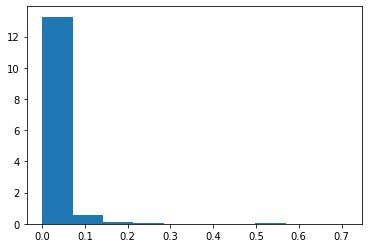

In [30]:
plt.hist(sn,density=True)
plt.show()

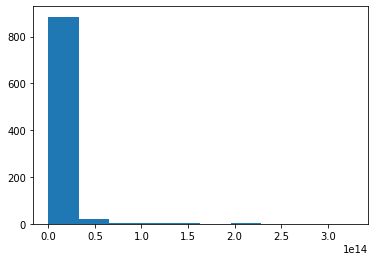

In [31]:
plt.hist(nn)
plt.show()